In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.regress import *
from aeons.endpoint import *
from aeons.plotting import *
from aeons.beta import *
figsettings()

In [8]:
name, samples = get_samples('gauss_16')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

$\log L = \log L_\mathrm{max} - \frac{1}{2\sigma^2} \exp({\frac{2}{d} \log X}) $

$ P(\log X) = \mathrm{const.}$

$ P(\log L) = P(\log X) \frac{\mathrm{d} \log X}{\mathrm{d} \log L} $

In [59]:
ndead = 5000
points = points_at_iteration(samples, ndead)
logXdead = points.logX().iloc[:ndead]

beta = 16/2 / (-points.logL.iloc[:ndead])

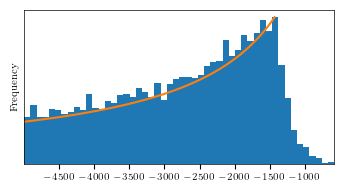

In [57]:
points.logL.drop_weights().plot.hist(bins=50)
plt.plot(points.logL.iloc[:ndead], beta*40000)

/tmp/ipykernel_54281/2363009991.py:19: RuntimeWarning: divide by zero encountered in log
  logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
/tmp/ipykernel_54281/2363009991.py:23: RuntimeWarning: divide by zero encountered in log
  logpdf_live = (d/2-1) * np.log(logLmax - logLlive)


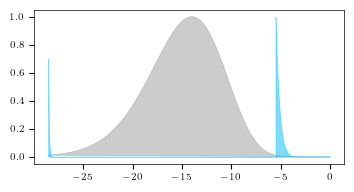

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from aeons.utils import figsettings

figsettings()
fig, ax = plt.subplots()

logLmax = 0
d = 30
n = 1000
avlogL = logLmax-d/2

logLs = logLmax-d/2/np.e
logLdead = np.linspace(logLmax-d/2-np.sqrt(d/2)*3.5, logLs, 1000)
logLlive = np.linspace(logLs,0,1000)
logLall = np.concatenate([logLdead, logLlive])

logpdf = logLall - logLmax + (d/2-1)*np.log(logLmax-logLall)
logpdf -= np.max(logpdf)
ax.fill(logLall, np.exp(logpdf), color='gray', alpha=.4, label='Posterior')

logpdf_live = (d/2-1) * np.log(logLmax - logLlive)
logpdf_live -= np.max(logpdf_live)
ax.fill_between(logLlive, 0, np.exp(logpdf_live), color='deepskyblue', alpha=0.5, label='Live points')

logpdf_dead = d/2 / (-logLdead) 
logpdf_dead -= np.max(logpdf_dead)
ax.fill_between(logLdead, 0, .7*np.exp(logpdf_dead), color='deepskyblue', alpha=0.5, label='Dead points')

In [71]:
logLdead

array([-28.55544171, -28.5323814 , -28.50932109, -28.48626078,
       -28.46320047, -28.44014016, -28.41707985, -28.39401954,
       -28.37095923, -28.34789892, -28.32483861, -28.3017783 ,
       -28.27871799, -28.25565768, -28.23259737, -28.20953706,
       -28.18647675, -28.16341643, -28.14035612, -28.11729581,
       -28.0942355 , -28.07117519, -28.04811488, -28.02505457,
       -28.00199426, -27.97893395, -27.95587364, -27.93281333,
       -27.90975302, -27.88669271, -27.8636324 , -27.84057209,
       -27.81751178, -27.79445147, -27.77139116, -27.74833085,
       -27.72527054, -27.70221023, -27.67914992, -27.65608961,
       -27.6330293 , -27.60996899, -27.58690867, -27.56384836,
       -27.54078805, -27.51772774, -27.49466743, -27.47160712,
       -27.44854681, -27.4254865 , -27.40242619, -27.37936588,
       -27.35630557, -27.33324526, -27.31018495, -27.28712464,
       -27.26406433, -27.24100402, -27.21794371, -27.1948834 ,
       -27.17182309, -27.14876278, -27.12570247, -27.10

In [2]:
from aeons.toy_samples import gaussian_samples
samples = gaussian_samples(1000, 16, 0.01)

In [153]:
name, samples = get_samples('correlated_3d')

In [154]:
iterations, *logXfs = read_from_txt(f'{data_dir}/logXfs/post/{name}.txt')
logXfs = np.array(logXfs)
true_endpoint = endpoints[name]
true_logXf = samples.logX().iloc[true_endpoint]

In [ ]:
nlive = 100
samples = planck_gaussian(nlive)

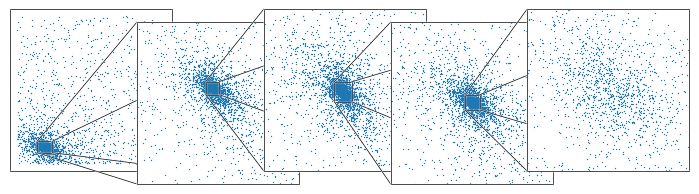

In [64]:
# import lecture_style
from anesthetic.examples.perfect_ns import planck_gaussian
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
from matplotlib import patheffects, rcParams
rcParams['path.effects'] = [patheffects.withStroke(linewidth=1, foreground='white')]

x = 'omegabh2'
y = 'omegach2'

fig, axes = plt.subplots(1,4, figsize=(7,2))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_box_aspect(1)
    ax.scatter(samples[x], samples[y], s=.2)
    # ax.set_rasterization_zorder(2)

axes[0].get_children()[-1].get_zorder()
axes[0].set_zorder(10)
axes[0].get_children()[-1].get_zorder()

def get_box(i):
    live = samples.live_points(i)
    xmin = live[x].min()
    xmax = live[x].max()
    ymin = live[y].min()
    ymax = live[y].max()
    return xmin, xmax, ymin, ymax

def inter_axis_line(fig, ax0, ax1, x, y, *args, **kwargs):
    coord0 = fig.transFigure.inverted().transform(ax0.transData.transform([x, y]))
    coord1 = fig.transFigure.inverted().transform(ax1.transData.transform([x, y]))
    return Line2D([coord0[0], coord1[0]], [coord0[1], coord1[1]], transform=fig.transFigure,*args, **kwargs)

def draw_zoom_lines(ax0, ax1, xmin, xmax, ymin, ymax):
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    zorder = max([child.get_zorder() for child in ax0.get_children()] +
                 [ax0.get_zorder()])
    ax1.set_zorder(zorder+2)
    lines = list(fig.lines)
    for x_ in [xmin, xmax]:
        for y_ in [ymin, ymax]:
            lines.append(inter_axis_line(fig, ax0, ax1, x_, y_, color='k',
                                         zorder=zorder+1,
                                         lw=rcParams['axes.linewidth']))
    rect = Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, color='k',
                     zorder=zorder+1, lw=rcParams['axes.linewidth'])
    ax0.add_patch(rect)
    fig.lines = lines


fig.tight_layout()
fig.canvas.draw()
fig.canvas.flush_events()
shift = 0.065

pos = axes[1].get_position()
pos.x0 -= shift
pos.x1 -= shift
pos.y0 -= shift
pos.y1 -= shift
axes[1].set_position(pos)

pos = axes[2].get_position()
pos.x0 -= shift*2
pos.x1 -= shift*2
axes[2].set_position(pos)

pos = axes[3].get_position()
pos.x0 -= shift*3
pos.x1 -= shift*3
pos.y0 -= shift
pos.y1 -= shift
axes[3].set_position(pos)

ax = fig.add_subplot(1,4,4)
ax.set_box_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(samples[x], samples[y], s=0.2)
axes = np.concatenate([axes, [ax]])

fig.canvas.draw()
fig.canvas.flush_events()
plot_live_points = False

for k, (i, ax0, ax1) in enumerate(zip(range(nlive*20, nlive*100, nlive*20), axes[:-1], axes[1:])):
    draw_zoom_lines(ax0, ax1, *get_box(i))

fig.canvas.draw()
fig.canvas.flush_events()

In [65]:
from anesthetic.examples.perfect_ns import planck_gaussian
samples = planck_gaussian(100)

In [66]:
save_samples('planck_gaussian_100', samples)

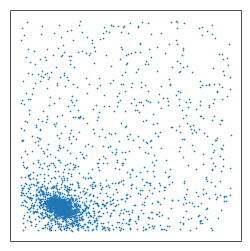

In [62]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.set_box_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(samples[x], samples[y], s=.5)
ax.set_rasterization_zorder(2)

In [37]:
ax.get_children()[0]

In [29]:
axes[0].get_children()[0]

2

<Axes: xlabel='omegabh2', ylabel='omegach2'>

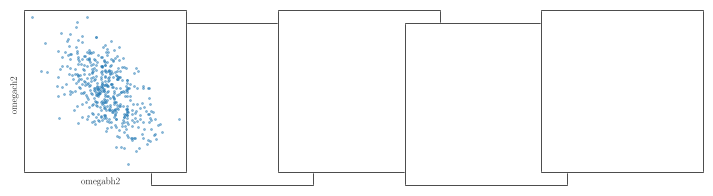

In [14]:
fig, axes = plt.subplots(1,4, figsize=(7,2))
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_box_aspect(1)

axes[0].get_children()[-1].get_zorder()
axes[0].set_zorder(10)
axes[0].get_children()[-1].get_zorder()

fig.tight_layout()
fig.canvas.draw()
fig.canvas.flush_events()
shift = 0.065

pos = axes[1].get_position()
pos.x0 -= shift
pos.x1 -= shift
pos.y0 -= shift
pos.y1 -= shift
axes[1].set_position(pos)

pos = axes[2].get_position()
pos.x0 -= shift*2
pos.x1 -= shift*2
axes[2].set_position(pos)

pos = axes[3].get_position()
pos.x0 -= shift*3
pos.x1 -= shift*3
pos.y0 -= shift
pos.y1 -= shift
axes[3].set_position(pos)

ax = fig.add_subplot(1,4,4)
ax.set_box_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
axes = np.concatenate([axes, [ax]])

